<h1><center>Laboratorio 4: La solicitud de Sergio 🤗</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Otoño 2025</strong></center>

### Cuerpo Docente:

- Profesores: Stefano Schiappacasse, Sebastián Tinoco
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Angelo Muñoz, Valentina Zúñiga

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Florencia Vargas
- Nombre de alumno 2: Mario Romero


### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/...../)

## Temas a tratar
- Aplicar Pandas para obtener características de un DataFrame.
- Aplicar Pipelines y Column Transformers.
- Utilizar diferentes algoritmos de cluster y ver el desempeño.

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda fuertemente asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio
- Comprender cómo aplicar pipelines de Scikit-Learn para generar clusters.
- Familiarizarse con plotly.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio

<center>
<img src="https://i.pinimg.com/originals/5a/a6/af/5aa6afde8490da403a21601adf7a7240.gif" width=400 />

En el corazón de las operaciones de Aerolínea Lucero, Sergio, el gerente de análisis de datos, reunió a un talentoso equipo de jóvenes científicos de datos para un desafío crucial: segmentar la base de datos de los clientes. “Nuestro objetivo es descubrir patrones en el comportamiento de los pasajeros que nos permitan personalizar servicios y optimizar nuestras campañas de marketing,” explicó Sergio, mientras desplegaba un amplio rango de datos que incluían desde hábitos de compra hasta opiniones sobre los vuelos.

Sergio encargó a los científicos de datos la tarea de aplicar técnicas avanzadas de clustering para identificar distintos segmentos de clientes, como los viajeros frecuentes y aquellos que eligen la aerolínea para celebrar ocasiones especiales. La meta principal era entender profundamente cómo estos grupos perciben la calidad y satisfacción de los servicios ofrecidos por la aerolínea.

A través de un enfoque meticuloso y colaborativo, los científicos de datos se abocaron a la tarea, buscando transformar los datos brutos en valiosos insights que permitirían a Aerolínea Lucero no solo mejorar su servicio, sino también fortalecer las relaciones con sus clientes mediante una oferta más personalizada y efectiva.

## Importamos librerias utiles 😸

In [ ]:
import numpy as np
import pandas as pd

from sklearn import datasets

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## 1. Estudio de Performance 📈 [10 Puntos]



<center>
<img src="https://i.pinimg.com/originals/23/b7/6e/23b76e9e77e63c0eec1a7b28372369e3.gif" width=300>

Don Sergio les ha encomendado su primera tarea: analizar diversas técnicas de clustering. Su objetivo es entender detalladamente cómo funcionan estos métodos en términos de segmentación y eficiencia en tiempo de ejecución.

Analice y compare el desempeño, tiempo de ejecución y visualizaciones de cuatro algoritmos de clustering (k-means, DBSCAN, Ward y GMM) aplicados a tres conjuntos de datos, incrementando progresivamente su tamaño. Utilice Plotly para las gráficas y discuta los resultados tanto cualitativa como cuantitativamente.

Uno de los requisitos establecidos por Sergio es que el análisis se lleve a cabo utilizando Plotly; de no ser así, se considerará incorrecto. Para facilitar este proceso, se ha proporcionado un código de Plotly que puede servir como base para realizar las gráficas. Apóyese en el código entregado para efectuar el análisis y tome como referencia la siguiente imagen para realizar los gráficos:

<img src='https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/Screenshot_2024-04-26_at_9.10.44_AM.png' width=800 />

En el gráfico se visualizan en dos dimensiones los diferentes tipos de datos proporcionados en `datasets`. Cada columna corresponde a un modelo de clustering diferente, mientras que cada fila representa un conjunto de datos distinto. Cada uno de los gráficos incluye el tiempo en segundos que tarda el análisis y la métrica Silhouette obtenida.

Para ser más específicos, usted debe cumplir los siguientes objetivos:
1. Generar una función que permita replicar el gráfico expuesto en la imagen (no importa que los colores calcen). [4 puntos]
2. Ejecuta la función para un `n_samples` igual a 1000, 5000, 10000. [2 puntos]
3. Analice y compare el desempeño, tiempo de ejecución y visualizaciones de cuatro algoritmos de clustering utilizando las 3 configuraciones dadas en `n_samples`. [4 puntos]


> ❗ Tiene libertad absoluta de escoger los hiper parámetros de los cluster, sin embargo, se recomienda verificar el dominio de las variables para realizar la segmentación.

> ❗ Recuerde que es obligatorio el uso de plotly.


In [ ]:
"""
En la siguiente celda se crean los datos ficticios a usar en la sección 1 del lab.
❗No realice cambios a esta celda a excepción de n_samples❗
"""

# Datos a utilizar

# Configuracion
n_samples = 5000 #Este parámetro si lo pueden modificar

def create_data(n_samples):

    # Lunas
    moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=30)
    # Blobs
    blobs = datasets.make_blobs(n_samples=n_samples, random_state=172)
    # Datos desiguales
    transformation = [[0.6, -0.6], [-0.4, 0.8]]
    mutated = (np.dot(blobs[0], transformation), blobs[1])

    # Generamos Dataset
    dataset = {
        'moons':{
            'x': moons[0], 'classes': moons[1], 'n_cluster': 2
        },
        'blobs':{
            'x': blobs[0], 'classes': blobs[1], 'n_cluster': 3
        },
        'mutated':{
            'x': mutated[0], 'classes': mutated[1], 'n_cluster': 3
        }
    }
    return dataset

data_sets = create_data(n_samples)

In [ ]:
 # creamos dicc
dic1 = create_data(1000)
dic2 = create_data(5000)
dic3 = create_data(10000)

In [ ]:
diccionarios = {'1000': dic1, '5000': dic2, '10000': dic3} #dicc con nombres para poner

for n_samples, dic in diccionarios.items():
    for nombre_dataset, contenido in dic.items():
        df = pd.DataFrame(contenido['x'], columns=['x1', 'x2'])  #lo pasamos a df
        df['class'] = contenido['classes']
        nombre_variable = f"df_{nombre_dataset}_{n_samples}" # le asignamos el nombre "intuitivo"
        globals()[nombre_variable] = df

In [ ]:
#df_moons_1000.head()
df_moons_5000.head()
#df_moons_10000.head()


x1        x2  class
0 -0.914735  0.471831      0
1  0.335647  0.935851      0
2  0.260778 -0.102830      1
3  0.491924 -0.439708      1
4  0.166058 -0.027027      1

**Respuestas:**

In [ ]:
import plotly.express as px

def plot_scatter(x, y, color, title=""):  #funcion para plotear la figura
    df = pd.DataFrame({'x': x, 'y': y, 'label': color})
    fig = px.scatter(df, x='x', y='y', color='label',
                     title=title,
                     opacity=0.8,
                     width=300, height=300)
    fig.update_traces(marker=dict(size=3))
    return fig


In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import plotly.subplots as sp
import time
import pandas as pd

def cluster_graf(diccionario, nombre_diccionario): # funcion para correr cluster
    fig = sp.make_subplots( #usamos subplots
        rows=3, cols=4, # usamos un 3x4 para que nos de como la foto
        subplot_titles=[f"" for _ in range(12)],
        horizontal_spacing=0.02,
        vertical_spacing=0.07
    )
    modelos = { #modelos propuestos en enunciado
        "KMeans": lambda k: KMeans(n_clusters=k, random_state=0),
        "DBSCAN": lambda k: DBSCAN(eps=0.3, min_samples=5),
        "Ward": lambda k: AgglomerativeClustering(n_clusters=k),
        "GMM": lambda k: GaussianMixture(n_components=k, random_state=0)
    }

    nombres_datasets = ["moons", "blobs", "mutated"] #datsets

    resumen = []  #  aqui guardo resultados que voy a printear en una tabla para comparar

    for i, nombre_dataset in enumerate(nombres_datasets): #recorro dt
        data = diccionario[nombre_dataset]
        X = StandardScaler().fit_transform(data['x']) #escalo
        k = data['n_cluster']

        for j, (nombre_modelo, constructor) in enumerate(modelos.items()):
            start = time.time()
            modelo = constructor(k)
            if nombre_modelo == "GMM":
                etiquetas = modelo.fit_predict(X)
            else:
                etiquetas = modelo.fit(X).labels_
            end = time.time()
            duracion = end - start

            sil = silhouette_score(X, etiquetas) if len(set(etiquetas)) > 1 else -1
            titulo = f"{nombre_modelo} | {nombre_dataset} | t={duracion:.2f}s | sil={sil:.2f}"

            # Guardar en resumen los valores
            resumen.append({
                "dataset": nombre_dataset,
                "modelo": nombre_modelo,
                "tiempo": duracion,
                "silhouette": sil
            })

            scatter = plot_scatter(X[:, 0], X[:, 1], etiquetas, title=titulo)
            for trace in scatter['data']:
                fig.add_trace(trace, row=i+1, col=j+1)

    fig.update_layout(
        height=1000,
        width=1300,
        title_text=f"Comparación Clustering para n_samples = {nombre_diccionario}",
        showlegend=False
    )
    fig.show()

    # Mostrar resume
    df_resumen = pd.DataFrame(resumen)
    display(df_resumen)


In [ ]:
for n_samples, dic in diccionarios.items(): # para mis 3 dic definicfod
    cluster_graf(dic, n_samples) #aplicamos la funcion

dataset  modelo    tiempo  silhouette
0     moons  KMeans  0.038615    0.498957
1     moons  DBSCAN  0.019451    0.388752
2     moons    Ward  0.126824    0.461694
3     moons     GMM  0.120389    0.499315
4     blobs  KMeans  0.010210    0.782985
5     blobs  DBSCAN  0.012195    0.677155
6     blobs    Ward  0.020667    0.782511
7     blobs     GMM  0.009906    0.782985
8   mutated  KMeans  0.007341    0.581049
9   mutated  DBSCAN  0.007714    0.346522
10  mutated    Ward  0.050828    0.554197
11  mutated     GMM  0.173730    0.534677

dataset  modelo    tiempo  silhouette
0     moons  KMeans  0.003639    0.497987
1     moons  DBSCAN  0.069061    0.392209
2     moons    Ward  0.897197    0.461357
3     moons     GMM  0.010971    0.498471
4     blobs  KMeans  0.002278    0.784063
5     blobs  DBSCAN  0.073975    0.784063
6     blobs    Ward  0.470308    0.784063
7     blobs     GMM  0.009679    0.784063
8   mutated  KMeans  0.002600    0.567520
9   mutated  DBSCAN  0.049481    0.526982
10  mutated    Ward  0.453403    0.538642
11  mutated     GMM  0.015716    0.528502

dataset  modelo    tiempo  silhouette
0     moons  KMeans  0.004712    0.498213
1     moons  DBSCAN  0.124715    0.392583
2     moons    Ward  2.570097    0.428940
3     moons     GMM  0.015617    0.498550
4     blobs  KMeans  0.003212    0.780651
5     blobs  DBSCAN  0.263429    0.681196
6     blobs    Ward  2.106110    0.780497
7     blobs     GMM  0.024259    0.780579
8   mutated  KMeans  0.003936    0.567022
9   mutated  DBSCAN  0.160814    0.565683
10  mutated    Ward  2.530380    0.548359
11  mutated     GMM  0.027804    0.525460

en resumen, kmeans es bueno en blobs, rapidp y buen rendimiento. GMM similar a kmeans pero no tan rapido. dbscan: bueno para no convexos y ward muy costoso => lento.

## 2. Análisis de Satisfacción de Vuelos. [10 puntos]

<center>
<img src="https://i.gifer.com/2Hci.gif" width=400 />

Habiendo entendido cómo funcionan los modelos de aprendizaje no supervisado, *Don Sergio* le encomienda estudiar la satisfacción de pasajeros al haber tomado un vuelo en alguna de sus aerolineas. Para esto, el magnate le dispone del dataset `aerolineas_licer.parquet`, el cual contiene el grado de satisfacción de los clientes frente a diferentes aspectos del vuelo. Las características del vuelo se definen a continuación:

- *Gender*: Género de los pasajeros (Femenino, Masculino)
- *Customer Type*: Tipo de cliente (Cliente habitual, cliente no habitual)
- *Age*: Edad actual de los pasajeros
- *Type of Travel*: Propósito del vuelo de los pasajeros (Viaje personal, Viaje de negocios)
- *Class*: Clase de viaje en el avión de los pasajeros (Business, Eco, Eco Plus)
- *Flight distance*: Distancia del vuelo de este viaje
- *Inflight wifi service*: Nivel de satisfacción del servicio de wifi durante el vuelo (0:No Aplicable; 1-5)
- *Departure/Arrival time convenient*: Nivel de satisfacción con la conveniencia del horario de salida/llegada
- *Ease of Online booking*: Nivel de satisfacción con la facilidad de reserva en línea
- *Gate location*: Nivel de satisfacción con la ubicación de la puerta
- *Food and drink*: Nivel de satisfacción con la comida y la bebida
- *Online boarding*: Nivel de satisfacción con el embarque en línea
- *Seat comfort*: Nivel de satisfacción con la comodidad del asiento
- *Inflight entertainment*: Nivel de satisfacción con el entretenimiento durante el vuelo
- *On-board service*: Nivel de satisfacción con el servicio a bordo
- *Leg room service*: Nivel de satisfacción con el espacio para las piernas
- *Baggage handling*: Nivel de satisfacción con el manejo del equipaje
- *Check-in service*: Nivel de satisfacción con el servicio de check-in
- *Inflight service*: Nivel de satisfacción con el servicio durante el vuelo
- *Cleanliness*: Nivel de satisfacción con la limpieza
- *Departure Delay in Minutes*: Minutos de retraso en la salida
- *Arrival Delay in Minutes*: Minutos de retraso en la llegada

En consideración de lo anterior, realice las siguientes tareas:

0. Ingeste el dataset a su ambiente de trabajo.

1. Seleccione **sólo las variables numéricas del dataset**.  Explique qué éfectos podría causar el uso de variables categóricas en un algoritmo no supervisado. [2 punto]

2. Realice una visualización de la distribución de cada variable y analice cada una de estas distribuciones. [2 punto]

3. Basándose en los gráficos, evalúe la necesidad de escalar los datos y explique el motivo de su decisión. [2 puntos]

4. Examine la correlación entre las variables mediante un correlograma. [2 puntos]

5. De acuerdo con los resultados obtenidos en 5, reduzca la dimensionalidad del conjunto de datos a cuatro variables, justificando su elección respecto a las variables que decide eliminar. [2 puntos]

**Respuesta:**

In [10]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [12]:
import pandas as pd
#ruta mario
ruta = "/content/drive/MyDrive/aerolineas_lucer.parquet"

#ruta FLo
#ruta_flo = ""

df = pd.read_parquet(ruta)


In [13]:
df.head(5)

id  Gender      Customer Type  Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  ...  Seat comfort  Inflight entertainment  \
0                       3  ...             5                       5   
1                       3  ...             1                       1   
2                       2  ...             5                       5   
3                       5  ...             2                       2   
4                       3  ...             5                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4               3.0                 4              4.0   
1                 1               5.0                 3              1.0   
2                 4               3.0                 4              4.0   
3                 2               5.0                 3              1.0   
4                 3               4.0                 4              3.0   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0               5.0            5                          25   
1               4.0            1                           1   
2               4.0            5                           0   
3               4.0            2                          11   
4               3.0            3                           0   

   Arrival Delay in Minutes  
0                      18.0  
1                       6.0  
2                       0.0  
3                       9.0  
4                       0.0  

[5 rows x 23 columns]

In [14]:
df.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                     float64
Baggage handling                       int64
Checkin service                      float64
Inflight service                     float64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: object

In [15]:
# seleccion numericas:
df = df.select_dtypes(include=['int64', 'float64'])



In [16]:
# eliminamos id q no nos suma
#df= df.drop(columns='id')

si seleccinamos caegoricas, tendriamos calculos no significaicos de distancias y por lo tanto clusters sin ssentido.

In [17]:
df

id  Age  Flight Distance  Inflight wifi service  \
0        70172   13              460                      3   
1         5047   25              235                      3   
2       110028   26             1142                      2   
3        24026   25              562                      2   
4       119299   61              214                      3   
...        ...  ...              ...                    ...   
118404   94171   23              192                      2   
118405   73097   49             2347                      4   
118406   68825   30             1995                      1   
118407   54173   22             1000                      1   
118408   62567   27             1723                      1   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                       4                       3   
1                                       2                       3   
2                                       2                       2   
3                                       5                       5   
4                                       3                       3   
...                                   ...                     ...   
118404                                  1                       2   
118405                                  4                       4   
118406                                  1                       1   
118407                                  1                       1   
118408                                  3                       3   

        Gate location  Food and drink  Online boarding  Seat comfort  \
0                   1               5                3             5   
1                   3               1                3             1   
2                   2               5                5             5   
3                   5               2                2             2   
4                   3               4                5             5   
...               ...             ...              ...           ...   
118404              3               2                2             2   
118405              4               2                4             5   
118406              3               4                1             5   
118407              5               1                1             1   
118408              3               1                1             1   

        Inflight entertainment  On-board service  Leg room service  \
0                            5                 4               3.0   
1                            1                 1               5.0   
2                            5                 4               3.0   
3                            2                 2               5.0   
4                            3                 3               4.0   
...                        ...               ...               ...   
118404                       2                 3               1.0   
118405                       5                 5               5.0   
118406                       4                 3               2.0   
118407                       1                 4               5.0   
118408                       1                 1               1.0   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                      4              4.0               5.0            5   
1                      3              1.0               4.0            1   
2                      4              4.0               4.0            5   
3                      3              1.0               4.0            2   
4                      4              3.0               3.0            3   
...                  ...              ...               ...          ...   
118404                 4              2.0               3.0            2   
118405                 5              5.0               5.0            4   
118406                 4            

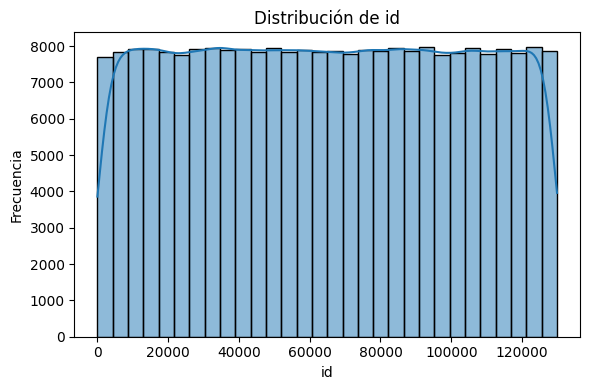

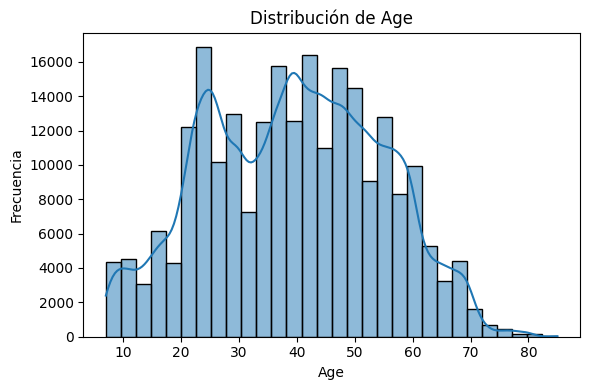

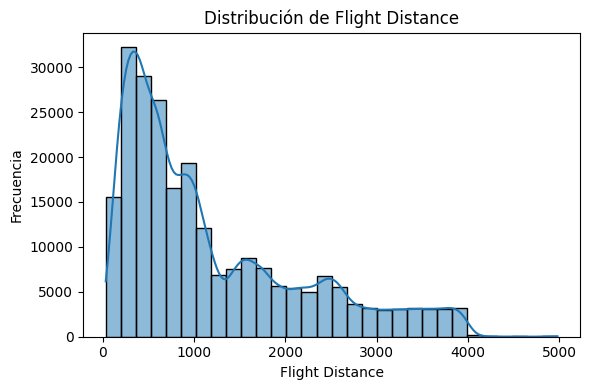

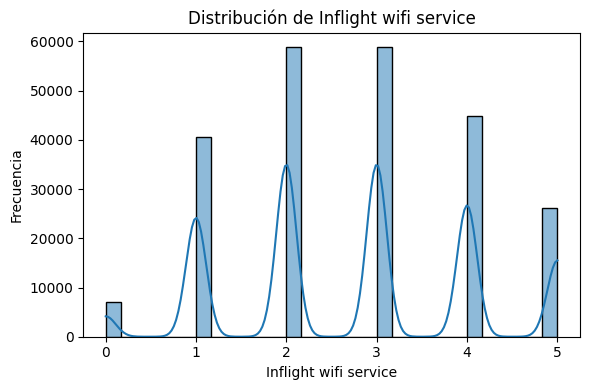

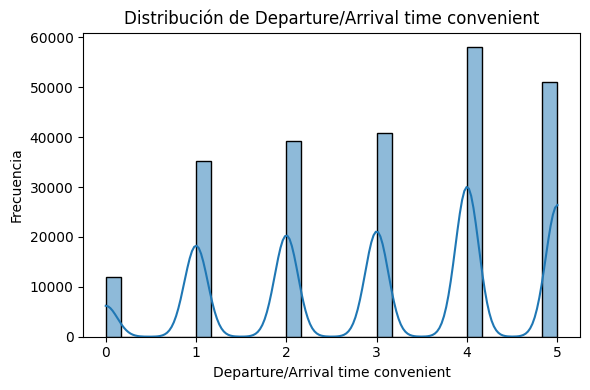

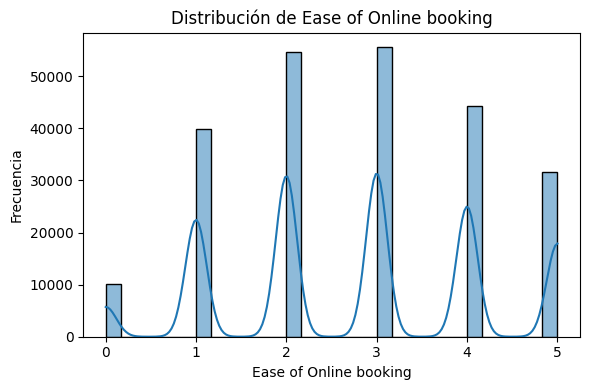

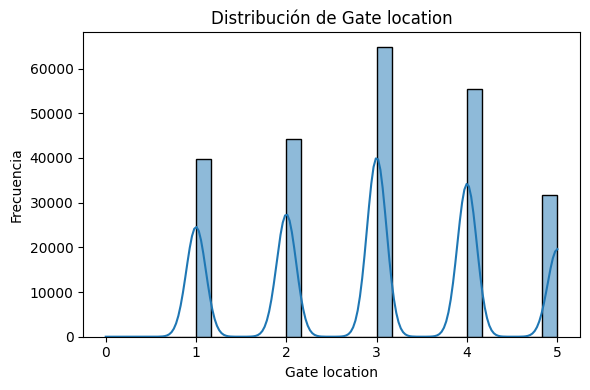

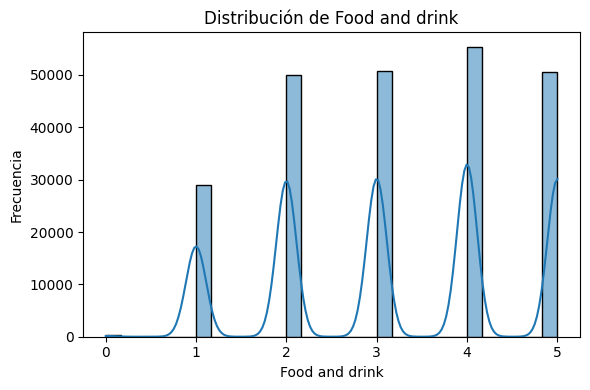

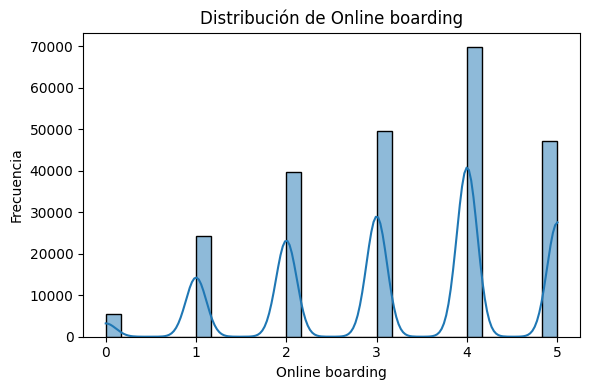

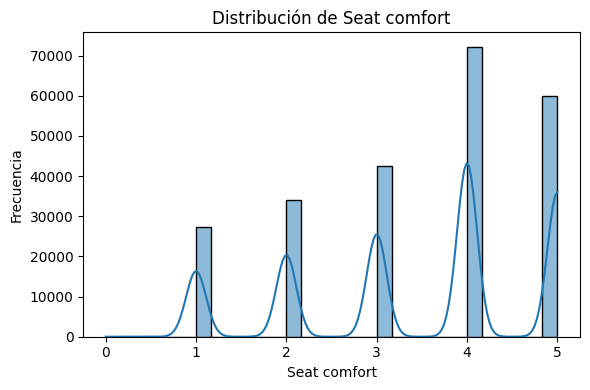

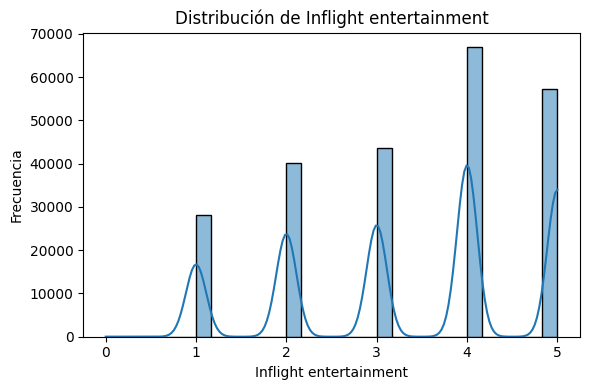

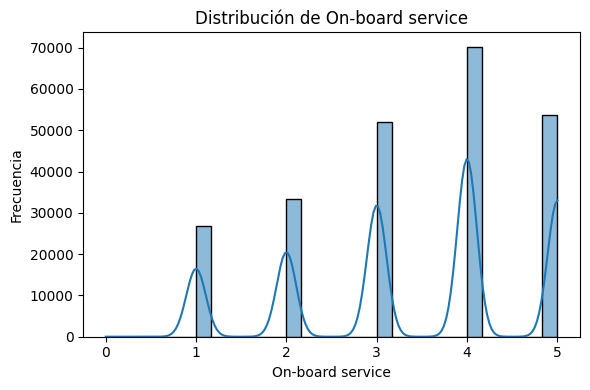

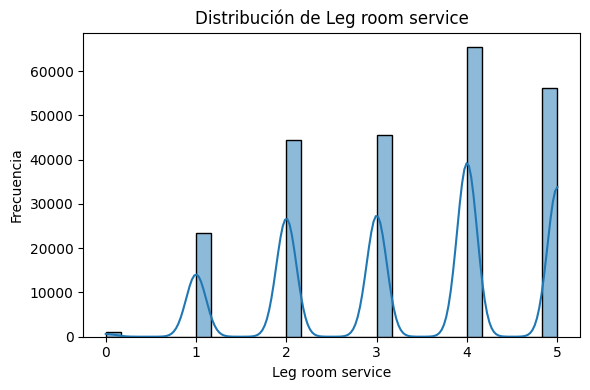

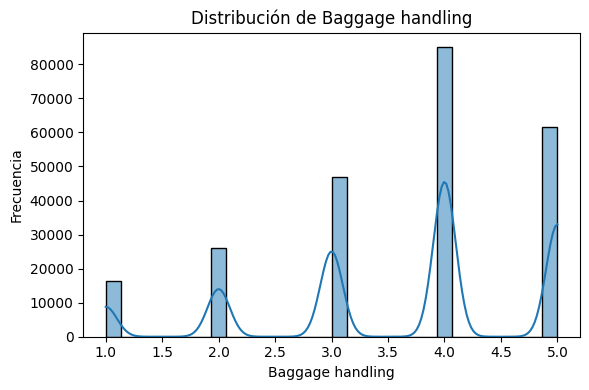

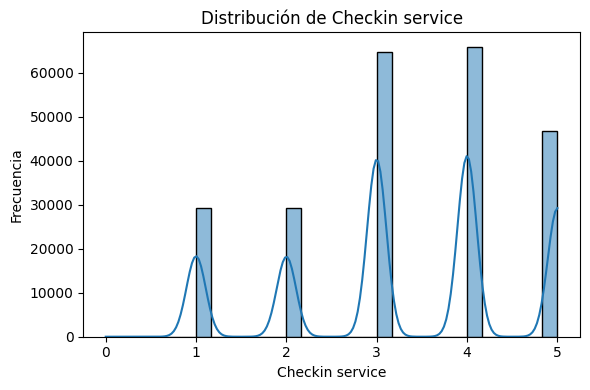

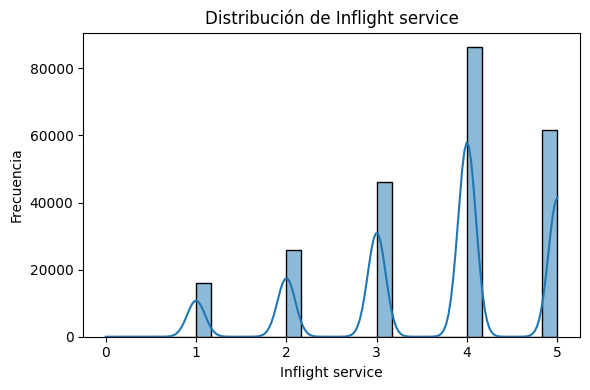

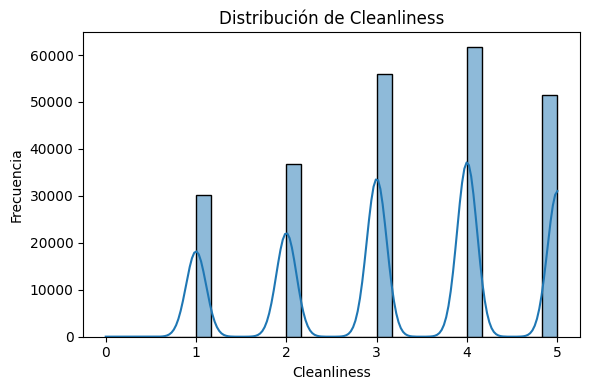

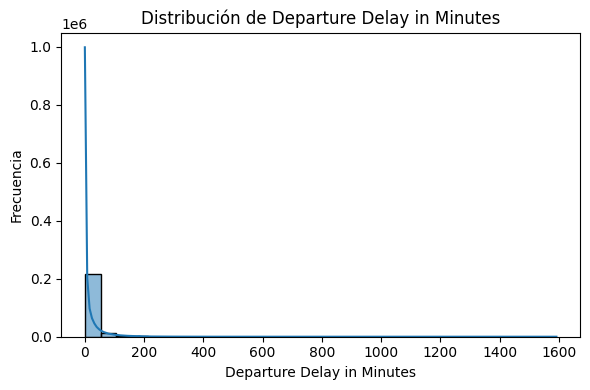

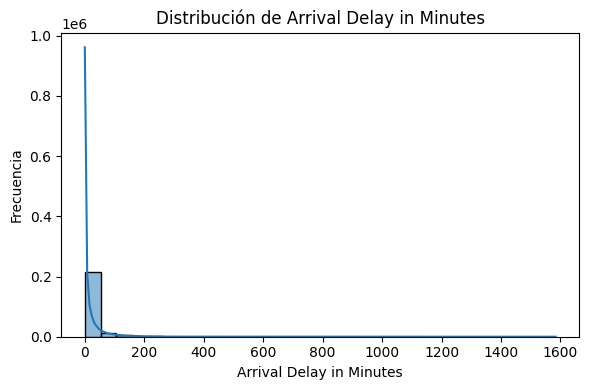

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


# Separar variables numéricas y categóricas
numericas = df.select_dtypes(include=['number'])
categoricas = df.select_dtypes(include=['object', 'category', 'bool'])

# Visualización de variables numéricas
for col in numericas.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

# Visualización de variables categóricas
for col in categoricas.columns:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()


Todas tienen una distribucio esperable.
destacar que arrival delay ce centra much entre 0 y 200, al igual que departure in minutes. sobre ls clasificaciones de 0 a 5casi todas se centran en 4.
La edad distribuye normal,



.vamos a escalar las columna: Arrival Delay in Minutes, Departure Delay in Minutes,Flight Distance. ya que son modelos de clustering y tener distancias muy diferentes a otras variables afectan el modelo




In [19]:
from sklearn.preprocessing import RobustScaler

# Columnas a escalar: las q nombras antes
columnas_a_escalar = ['Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Flight Distance']

# el escalador (ribust)
scaler = RobustScaler()
df[columnas_a_escalar] = scaler.fit_transform(df[columnas_a_escalar]) # Reemplazar col del df por las escaldas



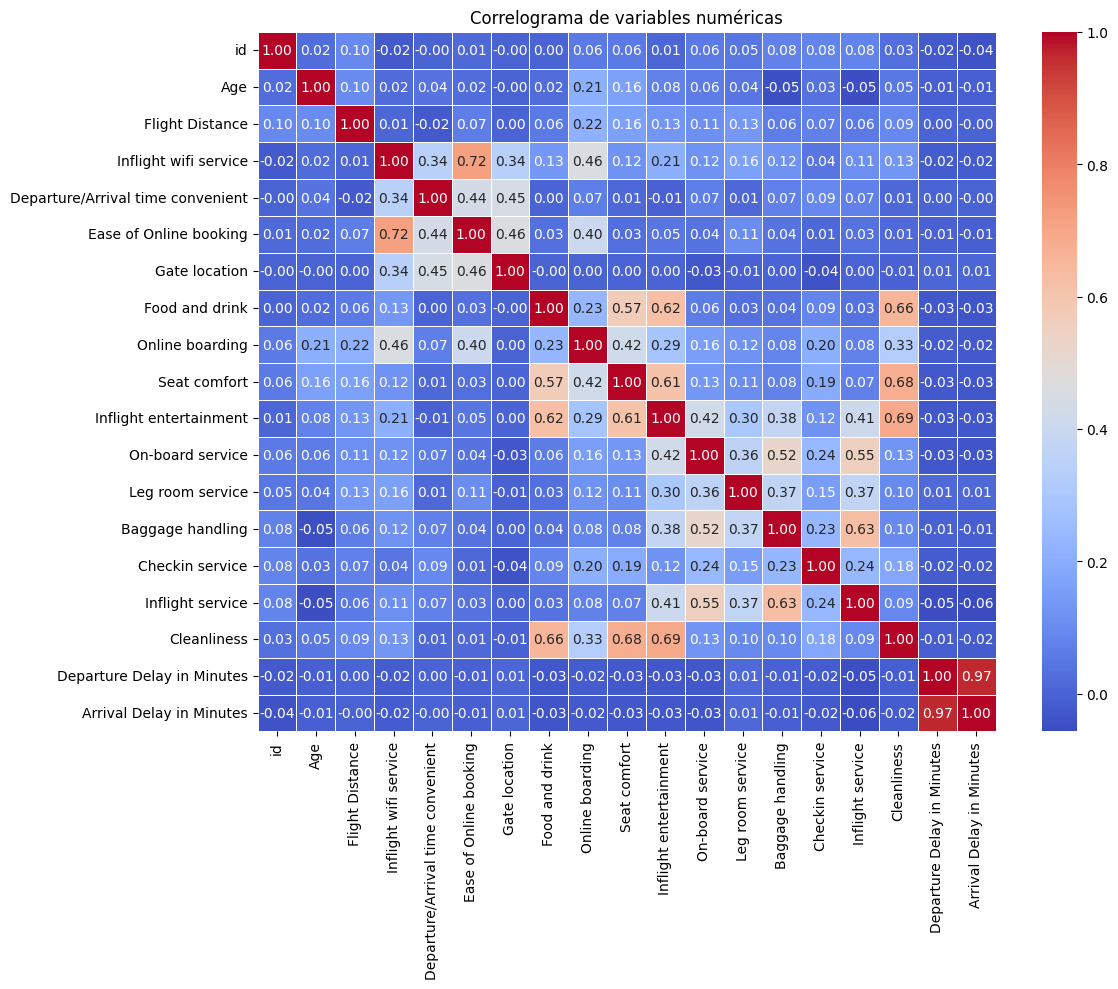

In [20]:
# Calculamos la matriz de corr
correlation_matrix = df.corr()

# graf de matriz
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlograma de variables numéricas')
plt.tight_layout()
plt.show()

vamos a eliminar las con altas correlaciones por la redndancia y vamos a usar las con mayor variacion. nos queddamoscononline boarding, inflight, cleanlines y slight distance.

In [21]:
df.head()

id  Age  Flight Distance  Inflight wifi service  \
0   70172   13        -0.287970                      3   
1    5047   25        -0.457143                      3   
2  110028   26         0.224812                      2   
3   24026   25        -0.211278                      2   
4  119299   61        -0.472932                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0               5                3             5                       5   
1               1                3             1                       1   
2               5                5             5                       5   
3               2                2             2                       2   
4               4                5             5                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4               3.0                 4              4.0   
1                 1               5.0                 3              1.0   
2                 4               3.0                 4              4.0   
3                 2               5.0                 3              1.0   
4                 3               4.0                 4              3.0   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0               5.0            5                    2.083333   
1               4.0            1                    0.083333   
2               4.0            5                    0.000000   
3               4.0            2                    0.916667   
4               3.0            3                    0.000000   

   Arrival Delay in Minutes  
0                  1.384615  
1                  0.461538  
2                  0.000000  
3                  0.692308  
4                  0.000000

In [22]:

variables_finales = ['id',
    'Online boarding',
    'Inflight entertainment',
    'Cleanliness',
    'Flight Distance'
]

# Reemplazar df
df = df[variables_finales]


In [23]:
df.head(3)

id  Online boarding  Inflight entertainment  Cleanliness  \
0   70172                3                       5            5   
1    5047                3                       1            1   
2  110028                5                       5            5   

   Flight Distance  
0        -0.287970  
1        -0.457143  
2         0.224812

## 3. Preprocesamiento 🎭. [10 puntos]

<center>
<img src="https://media4.giphy.com/media/vWst8QUOKAot6MHEZe/giphy.gif?cid=6c09b952gm5xylrj4k5caq2slgwivx9azbgb0ox297sk5zjx&ep=v1_internal_gif_by_id&rid=giphy.gif&ct=g" width=400>

Tras quedar satisfecho con los resultados presentados en el punto 2, el dueño de la empresa ha solicitado que se preprocesen los datos mediante un `pipeline`. Es crucial que este proceso tenga en cuenta las observaciones derivadas de los análisis anteriores. Adicionalmente, ha expresado su interés en visualizar el conjunto de datos en un gráfico de dos o tres dimensiones.

Basándose en los análisis realizados anteriormente:
1. Cree un `pipeline` que incluya PCA, utilizando las consideraciones mencionadas previamente para proyectar los datos a dos dimensiones. [4 puntos]
2. Grafique los resultados obtenidos y comente lo visualizado. [6 puntos]

**Respuestas:**

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt


In [25]:
# 1: vamos a usar el df modificado hasta la parte anteriror

pipeline_pca = Pipeline([
    ('scaler', RobustScaler()),
    ('pca', PCA(n_components=2, random_state=1)) # proyectad a 2 dimensiones
])

# Aplicar pipeline
df_pca = pipeline_pca.fit_transform(df)

In [26]:
df_pca

array([[ 0.70636383, -1.02138776],
       [-1.70006517, -0.03169059],
       [ 1.38845556, -0.37282904],
       ...,
       [ 0.09128051,  0.1964849 ],
       [-1.90769208,  0.48612597],
       [-1.70319852,  0.97837336]])

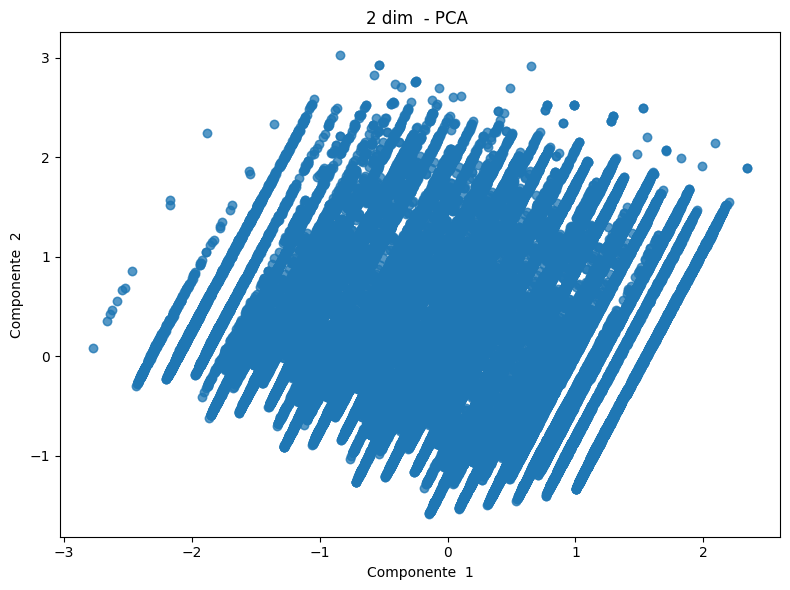

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5)
plt.title('2 dim  - PCA ')
plt.xlabel('Componente  1')
plt.ylabel('Componente  2')
plt.grid(False)
plt.tight_layout()
plt.show()

es nás alargada diagonalmente, por lo que la primera componente explica la varabilidad de datos, respecto a la segunfa.
No se observa una forma clara.


## 4. Outliers 🚫🙅‍♀️❌🙅‍♂️ [10 puntos]

<center>
<img src="https://joachim-gassen.github.io/images/ani_sim_bad_leverage.gif" width=250>

Con el objetivo de mantener la claridad en su análisis, Don Sergio le ha solicitado entrenar un modelo que identifique pasajeros con comportamientos altamente atípicos.

1. Utilice `IsolationForest` para clasificar las anomalías del dataset (sin aplicar PCA), configurando el modelo para que sólo el 1% de los datos sean considerados anómalos. Asegúrese de integrar esta tarea dentro de un `pipeline`. [3 puntos]

2. Visualice los resultados en el gráfico de dos dimensiones previamente creado. [3 puntos]

3. ¿Cómo evaluaría el rendimiento de su modelo en la detección de anomalías? [4 puntos]

**Respuestas:**

In [28]:
# Escriba su código aquí
# Escriba su código aquí
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest
import pandas as pd

df = df.copy()

pipeline_outliers = Pipeline([
    ('scaler', RobustScaler()),
    ('iso_forest', IsolationForest(contamination=0.01, random_state=42))
])

# Entrenar modelo
pipeline_outliers.fit(df)

# Obtener predicciones (-1 = outlier, 1 = normal)
scaled_data = pipeline_outliers.named_steps['scaler'].transform(df)
outlier_preds = pipeline_outliers.named_steps['iso_forest'].predict(scaled_data)

# Agregar columna de outliers
df_outliers = pd.DataFrame(df)  # Convert to DataFrame
df_outliers['outlier'] = outlier_preds

In [ ]:
#Para verificar si funciona bien
outlier_percentage = df_outliers['outlier'][df_outliers['outlier'] == -1].count() / len(df_outliers) * 100

print(f"Percentage of outliers: {outlier_percentage:.2f}%")

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Plot normal points
plt.scatter(df_pca[df_outliers['outlier'] == 1, 0],
            df_pca[df_outliers['outlier'] == 1, 1],
            alpha=0.5, label='Normal')

# Plot outliers en un color distinto
plt.scatter(df_pca[df_outliers['outlier'] == -1, 0],
            df_pca[df_outliers['outlier'] == -1, 1],
            alpha=0.8, color='red', label='Outlier')

plt.title('2D PCA with Outliers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

En base a lo que vemos en el gráfico, diría que es un desempeño correcto ya que efectivamente selecciona los puntos mas alejados o de zonas con menor densidad. Eso sí, no diria que es perfecto porque si mantiene ciertos puntos azules que pueden ser considerados como outliers, como por ejemplo el que esta en (3, 0.5). A pesar de esto, si es un buen modelo

## 5. Métricas de Desempeño 🚀 [10 puntos]

<center>
<img src="https://giffiles.alphacoders.com/219/219081.gif" width=300>

Motivado por incrementar su fortuna, Don Sergio le solicita entrenar un modelo que le permita segmentar a los pasajeros en grupos distintos, con el objetivo de optimizar las diversas campañas de marketing diseñadas por su equipo. Para ello, le se pide realizar las siguientes tareas:

1. Utilizar el modelo **Gaussian Mixture** y explore diferentes configuraciones de número de clústers, específicamente entre 3 y 8. Asegúrese de integrar esta operación dentro de un `pipeline`. [4 puntos]
2. Explique cuál sería el criterio adecuado para seleccionar el número óptimo de clústers. **Justifique de forma estadistica y a traves de gráficos.** [6 puntos]

> **HINT:** Se recomienda investigar sobre los criterios AIC y BIC para esta tarea.

**Respuestas:**

In [29]:
# Escriba su código aquí
# Escriba su código aquí
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler  # Or RobustScaler, as you used before
from sklearn.mixture import GaussianMixture
import numpy as np

# Assuming 'df' is your preprocessed DataFrame (with selected features)

def gmm_pipeline(n_clusters):
    """Creates a pipeline with GMM for a given number of clusters."""
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Adjust scaling if needed
        ('gmm', GaussianMixture(n_components=n_clusters, random_state=42))
    ])
    return pipeline

# Explore cluster configurations from 3 to 8
cluster_range = range(3, 9)  # 3, 4, 5, 6, 7, 8
gmm_results = {}

for n_clusters in cluster_range:
    pipeline = gmm_pipeline(n_clusters)
    pipeline.fit(df)  # Fit the pipeline to your data

    # Store the results (e.g., labels, model) for later analysis
    gmm_results[n_clusters] = {
        'labels': pipeline.named_steps['gmm'].predict(df),
        'model': pipeline.named_steps['gmm']
    }


gmm_results[5]

In [ ]:
#vamos a calcular AIC y BIC para cada configuracion de cluster para luego elegir
#el numero de cluster que minimiza AIC y BIC

for n_clusters in cluster_range:
         model = gmm_results[n_clusters]['model']
         aic = model.aic(df)  # Assuming 'df' is your data
         bic = model.bic(df)
         print(f"Number of Clusters: {n_clusters}, AIC: {aic}, BIC: {bic}")

Hay que tener en cuenta que AIC y BIC son medidas que penalizan los modelos con mas parametros para así evitar el "overfitting"y asegurar la calidad del modelo, por lo que un valor mas bajo indica un mejor balance entre ajustar bien a los datos y el overfitting.

Se puede ver que lo conveniente es con 3 numeros de cluster ya que minimiza los valores de AIC y BIC.


## 6. Análisis de resultados 📊 [10 puntos]

<center>
<img src="https://www.icegif.com/wp-content/uploads/2021/12/icegif-1407.gif" width=300>

Una vez identificado el número óptimo de clústers, se le pide realizar lo siguiente:

1. Utilizar la proyección en dos dimensiones para visualizar cada clúster claramente. [2 puntos]

2. ¿Es posible distinguir claramente entre los clústers generados? [2 puntos]

3. Proporcionar una descripción breve de cada clúster utilizando estadísticas descriptivas básicas, como la media y la desviación estándar, para resumir las características de las variables utilizadas en estos algoritmos. [2 puntos]

4. Proceda a visualizar los clústers en tres dimensiones para una perspectiva más detallada. [2 puntos]

5. ¿Cómo afecta esto a sus conclusiones anteriores? [2 puntos]

**Respuestas:**

In [30]:
# Escriba su código aquí
# Escriba su código aquí
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

n_clusters_used = 6

labels = gmm_results[n_clusters_used]['labels']

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title('GMM Clustering with {} Clusters (2D PCA)'.format(n_clusters_used))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

En base a la visualización en 2d se puede identificar bien cada cluster ya que estan en distintos colores, contrastando unos con otros

Mucho éxito!

<center>
<img src="https://i.pinimg.com/originals/55/3d/42/553d42bea9b10e0662a05aa8726fc7f4.gif" width=300>